In [1]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from scratch.linear_algebra import Vector
import matplotlib.pyplot as plt
%matplotlib inline

def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])


assert num_differences([1, 2, 3], [2, 1, 3]) == 2
assert num_differences([1, 2], [1, 2]) == 0

In [2]:
from typing import List
from scratch.linear_algebra import vector_mean

def cluster_means(k: int, inputs: List[Vector], assignments: List[int]) -> List[Vector]:
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)
    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs) for cluster in clusters]

In [3]:
import itertools
import random
import tqdm
from scratch.linear_algebra import squared_distance

class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k
        # number of clusters
        self.means = None
        
    def classify(self, input: Vector) -> int:
        """return the index of the cluster closest to the input"""
        return min(range(self.k), key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs: List[Vector]) -> None:
        # Start with random assignments
        assignments = [random.randrange(self.k) for _ in inputs]

        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]
                # Check how many assignments changed and if we're done
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return
                # Otherwise keep the new assignments, and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

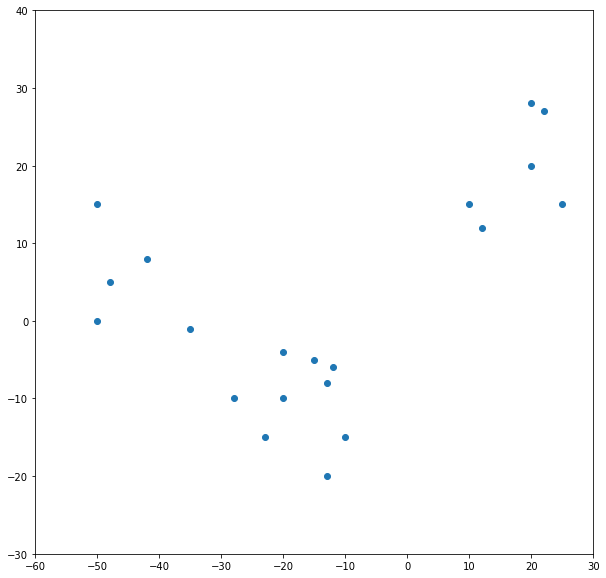

In [4]:
inputs = [[-50, 0], [-50, 15], [-48, 5], [-42, 8], [-35, -1],
         [-28, -10], [-23, -15], [-20, -10], [-20, -4], [-15, -5], [-12, -6], [-13, -8],[ -10, -15], [-13, -20],
         [10, 15], [12, 12], [20, 20], [20, 28], [22, 27], [25, 15]]

x, y = zip(*inputs)

fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim(-60, 30)
plt.ylim(-30, 40)
ax.scatter(x, y)
plt.show()

In [5]:
random.seed(12) # so you get the same results as me
clusterer = KMeans(k=3)
clusterer.train(inputs)

clusterer.train(inputs)
means = sorted(clusterer.means) # sort for the unit test

assert len(means) == 3
# Check that the means are close to what we expect
assert squared_distance(means[0], [-45, 5]) < 1
assert squared_distance(means[1], [-17, -10]) < 1
assert squared_distance(means[2], [18, 20]) < 1

changed: 5 / 20: : 2it [00:00, 1894.02it/s]
changed: 1 / 20: : 3it [00:00, 2355.47it/s]


In [6]:
random.seed(0)
clusterer = KMeans(k=2)
clusterer.train(inputs)
means = sorted(clusterer.means)

assert len(means) == 2
assert squared_distance(means[0], [-27, -5]) < 1
assert squared_distance(means[1], [18, 20]) < 1

changed: 1 / 20: : 2it [00:00, 2834.95it/s]


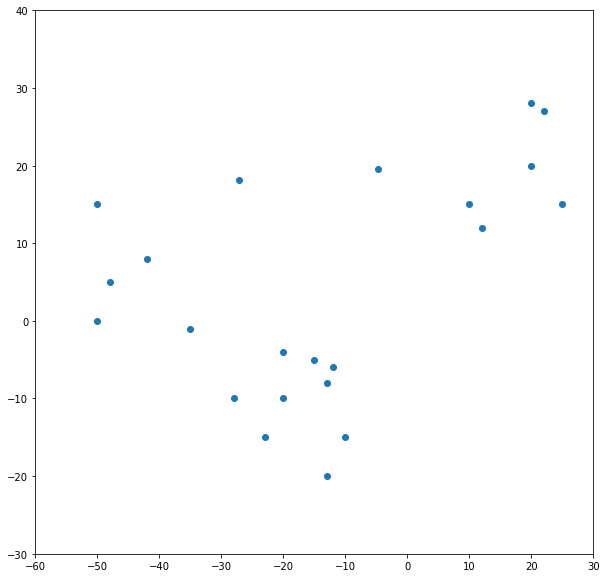

In [7]:
x = list(x)
x.append(means[0][0])
x.append(means[0][1])
x = tuple(x)
y = list(y)
y.append(means[1][0])
y.append(means[1][1])
y = tuple(y)

fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim(-60, 30)
plt.ylim(-30, 40)
ax.scatter(x, y)
plt.show()

0it [00:00, ?it/s]
changed: 2 / 20: : 2it [00:00, 3061.54it/s]
changed: 1 / 20: : 3it [00:00, 2833.35it/s]
changed: 2 / 20: : 3it [00:00, 1148.81it/s]
changed: 4 / 20: : 2it [00:00, 2309.00it/s]
changed: 1 / 20: : 3it [00:00, 2319.43it/s]
changed: 3 / 20: : 2it [00:00, 2021.35it/s]
changed: 2 / 20: : 3it [00:00, 2054.35it/s]
changed: 1 / 20: : 4it [00:00, 2018.92it/s]
changed: 6 / 20: : 2it [00:00, 1668.38it/s]
changed: 2 / 20: : 4it [00:00, 1729.25it/s]
changed: 2 / 20: : 3it [00:00, 1572.08it/s]
changed: 1 / 20: : 4it [00:00, 1570.61it/s]
changed: 3 / 20: : 4it [00:00, 1560.24it/s]
changed: 4 / 20: : 3it [00:00, 1411.27it/s]
changed: 1 / 20: : 3it [00:00, 1369.49it/s]
changed: 1 / 20: : 3it [00:00, 1254.28it/s]
changed: 3 / 20: : 3it [00:00, 1162.39it/s]
changed: 2 / 20: : 3it [00:00, 1164.76it/s]
changed: 2 / 20: : 4it [00:00, 1095.12it/s]


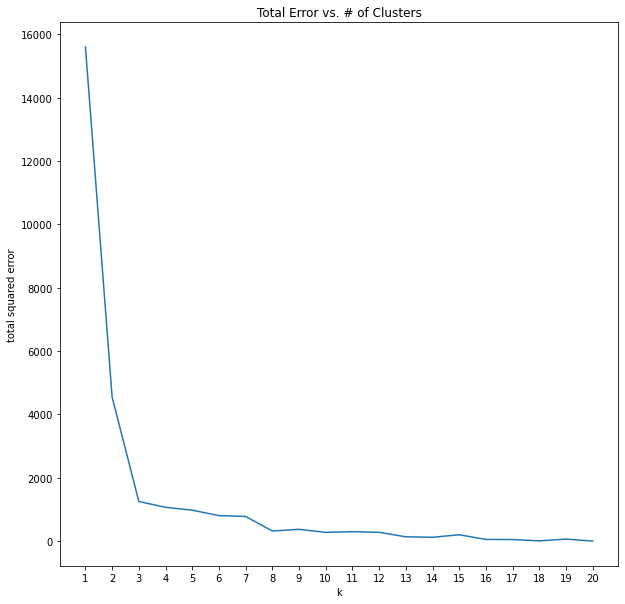

In [8]:
def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]
    return sum(squared_distance(input, means[cluster]) for input, cluster in zip(inputs, assignments))

# now plot from 1 up to len(inputs) clusters
ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

--------------------
--------------------

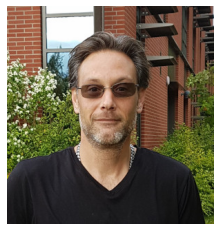

In [9]:
image_path = r"DK_head.jpg"
# image_path = r"grub_background.png"
# wherever your image is
import matplotlib.image as mpimg
# plt.figure(figsize=(20,20))
img = mpimg.imread(image_path) / 256 # rescale to between 0 and 1
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

In [11]:
# .tolist() converts a NumPy array to a Python list
pixels = [pixel.tolist() for row in img for pixel in row]

In [12]:
clusterer = KMeans(2)
clusterer.train(pixels) # this might take a while

changed: 3 / 94800: : 23it [00:07,  3.27it/s]   


In [13]:
def recolor(pixel: Vector) -> Vector:
    # index of the closest cluster
    cluster = clusterer.classify(pixel)
    # mean of the closest cluster
    return clusterer.means[cluster] 

# recolor this row of pixels for each row in the image
new_img = [[recolor(pixel) for pixel in row] for row in img] 

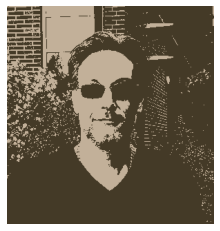

In [14]:
# plt.figure(figsize=(20,20))
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [15]:
clusterer = KMeans(3)
clusterer.train(pixels) # this might take a while

changed: 3 / 94800: : 17it [00:07,  2.40it/s]   


In [16]:
def recolor(pixel: Vector) -> Vector:
    # index of the closest cluster
    cluster = clusterer.classify(pixel)
    # mean of the closest cluster
    return clusterer.means[cluster] 

# recolor this row of pixels for each row in the image
new_img = [[recolor(pixel) for pixel in row] for row in img] 

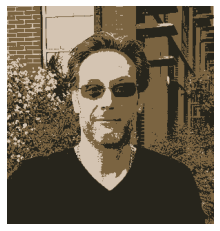

In [17]:
# plt.figure(figsize=(20,20))
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [18]:
clusterer = KMeans(4)
clusterer.train(pixels) # this might take a while

changed: 2 / 94800: : 54it [00:27,  1.94it/s]   


In [19]:
def recolor(pixel: Vector) -> Vector:
    # index of the closest cluster
    cluster = clusterer.classify(pixel)
    # mean of the closest cluster
    return clusterer.means[cluster] 

# recolor this row of pixels for each row in the image
new_img = [[recolor(pixel) for pixel in row] for row in img] 

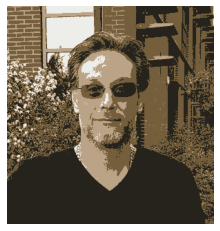

In [20]:
# plt.figure(figsize=(20,20))
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [21]:
clusterer = KMeans(5)
clusterer.train(pixels) # this might take a while

changed: 1 / 94800: : 56it [00:34,  1.61it/s]   


In [22]:
def recolor(pixel: Vector) -> Vector:
    # index of the closest cluster
    cluster = clusterer.classify(pixel)
    # mean of the closest cluster
    return clusterer.means[cluster] 

# recolor this row of pixels for each row in the image
new_img = [[recolor(pixel) for pixel in row] for row in img] 

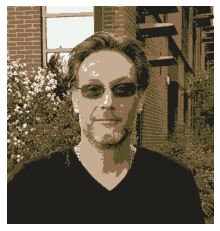

In [23]:
# plt.figure(figsize=(20,20))
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [24]:
clusterer = KMeans(6)
clusterer.train(pixels) # this might take a while

changed: 6 / 94800: : 63it [00:45,  1.39it/s]   


In [25]:
def recolor(pixel: Vector) -> Vector:
    # index of the closest cluster
    cluster = clusterer.classify(pixel)
    # mean of the closest cluster
    return clusterer.means[cluster] 

# recolor this row of pixels for each row in the image
new_img = [[recolor(pixel) for pixel in row] for row in img] 

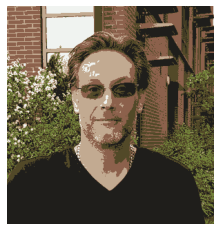

In [26]:
# plt.figure(figsize=(20,20))
plt.imshow(new_img)
plt.axis('off')
plt.show()

changed: 3 / 94800: : 24it [00:07,  3.30it/s]   


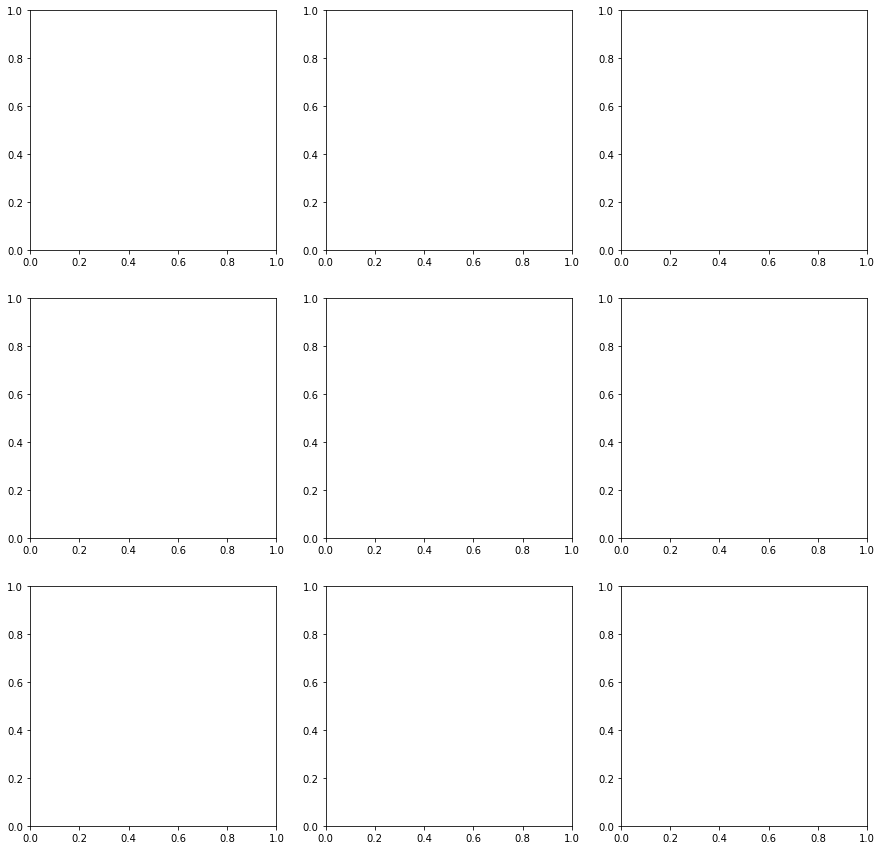

In [27]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))
# plt.figure(figsize=(20,20))
k = 2
img_list = []
for i in range(0,1):
    for j in range(0, 1):
        clusterer = KMeans(k)
        clusterer.train(pixels)
        new_img = [[recolor(pixel) for pixel in row] for row in img]
        img_list.append(new_img)
#         axs[i, j].imshow(new_img)
#         k += 1

In [28]:
        
for i in range(0,3):
    for j in range(0, 3):
        axs[i, j].imshow(img_list[i+j])
plt.axis('off')
plt.show()
    

IndexError: list index out of range

In [ ]:
axs[1,2].imshow(new_img)

In [ ]:
plt.show()

In [ ]:
plt.show()